In [169]:
import pandas as pd

In [170]:
df = pd.read_csv('../data/curated/procesed_data.csv')

In [171]:
df

,distance_to_CBD,time_to_CBD,distance_to_station,time_to_station,Cemeteries,Civic squares and promenades,Conservation reserves,Government schools,Natural and semi-natural open space,Non-government schools,...,Median_tot_fam_inc_weekly/inflation,Median_tot_hhd_inc_weekly/inflation,Median_tot_prsnl_inc_weekly/inflation,average_weekly_rent/inflation/household_size,A Crimes against the person/per_person,B Property and deception offences/per_person,C Drug offences/per_person,D Public order and security offences/per_person,E Justice procedures offences/per_person,F Other offences/per_person
0,9.595616,7.212516,4.753590,3.277145,0.000000,0.0,0.0,1.791759,3.555348,0.693147,...,7.908261,7.706664,6.695184,154.457569,0.000179,0.000179,0.000036,0.000024,0.000048,0.000024
1,9.106357,6.883155,7.301957,5.320568,0.693147,0.0,0.0,0.693147,0.000000,2.302585,...,7.726884,7.420758,6.856112,173.875976,0.000277,0.000351,0.000073,0.000117,0.000117,0.000000
2,10.534025,7.665097,7.165416,5.091908,0.000000,0.0,0.0,0.693147,0.000000,0.000000,...,7.174751,6.999211,6.256205,133.907353,0.001972,0.003284,0.000986,0.000658,0.001315,0.000000
3,8.787022,6.650796,7.822325,6.009796,0.000000,0.0,0.0,0.000000,1.609438,0.000000,...,7.894372,7.512192,7.038084,267.574167,0.000650,0.000910,0.000130,0.000260,0.000195,0.000000
4,10.234567,7.623837,8.514610,6.418365,0.000000,0.0,0.0,2.302585,4.553877,1.791759,...,7.632488,7.611709,6.698840,114.526777,0.000177,0.000199,0.000055,0.000066,0.000055,0.000011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2963,9.272611,6.995675,7.484032,5.529826,0.000000,0.0,0.0,0.000000,0.000000,0.000000,...,7.920874,7.615618,7.027431,190.136084,0.000114,0.000286,0.000029,0.000057,0.000086,0.000029
2964,9.035951,7.018939,5.797576,4.194190,0.000000,0.0,0.0,0.000000,0.000000,0.000000,...,7.844572,7.494505,6.962580,174.045808,0.000090,0.000180,0.000000,0.000030,0.000030,0.000000
2965,9.206383,6.839798,5.434595,3.010621,0.000000,0.0,0.0,0.693147,2.995732,2.079442,...,7.894420,7.668601,6.989829,165.648861,0.000169,0.000314,0.000048,0.000145,0.000073,0.000000
2966,10.237890,7.494263,6.253636,4.141546,0.000000,0.0,0.0,2.397895,2.708050,1.386294,...,7.035409,6.942072,6.041823,112.446071,0.000153,0.000200,0.000048,0.000095,0.000067,0.000019


In [172]:
# Step 1: Sort the DataFrame by SAL_CODE and year
df = df.sort_values(by=['SAL_CODE', 'year'])

# Step 2: Calculate the yearly growth
df['yearly_growth'] = df.groupby('SAL_CODE')["average_weekly_rent/inflation/household_size"].pct_change()
df['previous_growth'] = df.groupby('SAL_CODE')['average_weekly_rent/inflation/household_size'].pct_change().shift(1)

df['previous_rent'] = df.groupby('SAL_CODE')["average_weekly_rent/inflation/household_size"].shift(1)

df.head(10)


,distance_to_CBD,time_to_CBD,distance_to_station,time_to_station,Cemeteries,Civic squares and promenades,Conservation reserves,Government schools,Natural and semi-natural open space,Non-government schools,...,average_weekly_rent/inflation/household_size,A Crimes against the person/per_person,B Property and deception offences/per_person,C Drug offences/per_person,D Public order and security offences/per_person,E Justice procedures offences/per_person,F Other offences/per_person,yearly_growth,previous_growth,previous_rent
81,8.370270,6.464744,6.779240,5.107157,0.0,0.0,0.0,0.693147,2.772589,1.098612,...,211.535750,0.000505,0.000621,0.000117,0.000350,0.000233,0.000000,NaN,NaN,NaN
627,8.370270,6.464744,6.779240,5.107157,0.0,0.0,0.0,0.693147,2.772589,1.098612,...,217.661448,0.000387,0.000476,0.000119,0.000208,0.000179,0.000000,0.028958,NaN,211.535750
904,8.370270,6.464744,6.779240,5.107157,0.0,0.0,0.0,0.693147,2.772589,1.098612,...,226.640008,0.000338,0.000386,0.000097,0.000241,0.000145,0.000000,0.041250,0.028958,217.661448
1426,8.370270,6.464744,6.779240,5.107157,0.0,0.0,0.0,0.693147,2.772589,1.098612,...,235.938548,0.000264,0.000325,0.000061,0.000162,0.000122,0.000020,0.041028,0.041250,226.640008
1532,8.370270,6.464744,6.779240,5.107157,0.0,0.0,0.0,0.693147,2.772589,1.098612,...,228.533323,0.000245,0.000298,0.000070,0.000158,0.000105,0.000035,-0.031386,0.041028,235.938548
2088,8.370270,6.464744,6.779240,5.107157,0.0,0.0,0.0,0.693147,2.772589,1.098612,...,207.546201,0.000231,0.000262,0.000092,0.000108,0.000062,0.000031,-0.091834,-0.031386,228.533323
2229,8.370270,6.464744,6.779240,5.107157,0.0,0.0,0.0,0.693147,2.772589,1.098612,...,217.024780,0.000238,0.000253,0.000030,0.000104,0.000089,0.000015,0.045670,-0.091834,207.546201
2828,8.370270,6.464744,6.779240,5.107157,0.0,0.0,0.0,0.693147,2.772589,1.098612,...,241.389154,0.000215,0.000230,0.000043,0.000115,0.000086,0.000014,0.112265,0.045670,217.024780
150,9.313159,7.105868,7.801432,5.471850,0.0,0.0,0.0,0.693147,1.098612,1.791759,...,136.160942,0.000240,0.000329,0.000060,0.000060,0.000060,0.000000,NaN,0.112265,NaN
674,9.313159,7.105868,7.801432,5.471850,0.0,0.0,0.0,0.693147,1.098612,1.791759,...,140.161522,0.000202,0.000303,0.000025,0.000126,0.000076,0.000000,0.029381,NaN,136.160942


In [191]:
df.columns

Index(['distance_to_CBD', 'time_to_CBD', 'distance_to_station',
       'time_to_station', 'Cemeteries', 'Civic squares and promenades',
       'Conservation reserves', 'Government schools',
       'Natural and semi-natural open space', 'Non-government schools',
       'Parks and gardens', 'Public housing reserves', 'Recreation corridor',
       'Services and utilities reserves',
       'Sportsfields and organised recreation', 'Tertiary institutions',
       'Transport reservations', 'year', 'Average_household_size',
       'Average_num_psns_per_bedroom', 'Median_age_persons', 'Tot_P_P',
       'Total_dwelings', 'average_quarterly_count', 'commercial', 'education',
       'food_establishments', 'healthcare', 'industrial', 'public_transport',
       'recreation', 'residential', 'shopping', 'SAL_CODE', 'median_score',
       'average_price', 'proximity_to_beach', 'interest_rate',
       'Median_tot_fam_inc_weekly/inflation',
       'Median_tot_hhd_inc_weekly/inflation',
       'Median_tot

In [192]:
temporal_variables = ['Total_dwelings', 'average_quarterly_count', 'commercial', 'education',
       'food_establishments', 'healthcare', 'industrial', 'public_transport',
       'recreation', 'residential', 'shopping', 'SAL_CODE', 'median_score',
       'average_price','interest_rate','Median_tot_fam_inc_weekly/inflation',
       'Median_tot_hhd_inc_weekly/inflation',
       'Median_tot_prsnl_inc_weekly/inflation',
       'average_weekly_rent/inflation/household_size','A Crimes against the person/per_person',
       'B Property and deception offences/per_person',
       'C Drug offences/per_person',
       'D Public order and security offences/per_person',
       'E Justice procedures offences/per_person',
       'F Other offences/per_person', 'yearly_growth', 'previous_growth',
       'previous_rent']

In [194]:
# remove Nan for the first year
df = df.dropna()


In [197]:
target = 'yearly_growth'

In [198]:
X = df[temporal_variables].drop(columns = target)
y = df[target]

In [199]:
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

# Define the independent variables (X) and the dependent variable (y)
X = df.drop(columns=['year','SAL_CODE','yearly_growth'])

y = df['yearly_growth']

# Initialize the linear regression model
model = LinearRegression()

# Fit the model
model.fit(X, y)

# Print the coefficients
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

# Predict the yearly growth
y_pred = model.predict(X)
print("Predicted yearly growth:", y_pred)

# Calculate R^2 (coefficient of determination)
r2 = r2_score(y, y_pred)
print("R^2:", r2)

# Calculate RMSE (Root Mean Squared Error)
rmse = np.sqrt(mean_squared_error(y, y_pred))
print("RMSE:", rmse)
# Initialize the random forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model
rf_model.fit(X, y)

# Predict the yearly growth
y_pred_rf = rf_model.predict(X)
print("Predicted yearly growth (Random Forest):", y_pred_rf)

# Calculate R^2 (coefficient of determination)
r2_rf = r2_score(y, y_pred_rf)
print("R^2 (Random Forest):", r2_rf)

# Calculate RMSE (Root Mean Squared Error)
rmse_rf = np.sqrt(mean_squared_error(y, y_pred_rf))
print("RMSE (Random Forest):", rmse_rf)

Coefficients: [-2.30468437e-03  4.87285163e-03  1.18728674e-03 -8.17875248e-04
 -2.59211611e-05  1.59636224e-04  3.47926964e-04 -1.17875032e-04
 -3.73742257e-04  1.53788128e-04  1.04984654e-03 -6.99649772e-05
  1.06266670e-04 -5.72130176e-05 -3.58443321e-05 -1.42924557e-04
  7.45745346e-04 -4.69081996e-02  2.06880871e-02  2.27184564e-03
 -3.66260413e-03  5.07296299e-03 -8.23868884e-04 -1.84160236e-04
  2.46474970e-04  3.83124210e-04 -4.70600237e-04 -5.36017319e-04
 -7.20317133e-04 -1.15423486e-03 -2.00390967e-04  3.97542906e-04
 -1.70041879e-03 -1.09086905e-05 -2.85771397e-03  3.95566166e-03
 -7.31119760e-03  2.26099746e-02 -1.34122089e-02  4.88121554e-03
  8.83399295e-01  1.75066546e+00 -2.80866816e+00 -6.43034384e+00
  5.44880606e+00  2.16902158e+01  1.63009532e-02 -4.95458380e-03]
Intercept: 0.007713704069683582
Predicted yearly growth: [0.04792166 0.04855616 0.03820781 ... 0.19975583 0.00593254 0.02599033]
R^2: 0.960197570296533
RMSE: 0.007982619326572047
Predicted yearly growth (R

In [200]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Initialize the random forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model
rf_model.fit(X_train, y_train)

# Predict the yearly growth on the test set
y_pred_rf_test = rf_model.predict(X_test)

# Calculate R^2 (coefficient of determination) on the test set
r2_rf_test = r2_score(y_test, y_pred_rf_test)
print("R^2 (Random Forest) on test set:", r2_rf_test)

# Calculate RMSE (Root Mean Squared Error) on the test set
rmse_rf_test = np.sqrt(mean_squared_error(y_test, y_pred_rf_test))
print("RMSE (Random Forest) on test set:", rmse_rf_test)

R^2 (Random Forest) on test set: 0.7801604516018732
RMSE (Random Forest) on test set: 0.01900815869657334


In [201]:
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score

# Initialize the XGBoost model
xgb_model = XGBRegressor(n_estimators=100)

# Perform cross-validation
cv_scores = cross_val_score(xgb_model, X, y, cv=5, scoring='r2')

# Print the cross-validation scores
print("Cross-validation R^2 scores:", cv_scores)
print("Mean R^2 score:", cv_scores.mean())
print("Standard deviation of R^2 scores:", cv_scores.std())

Cross-validation R^2 scores: [-0.20245952  0.52319204  0.63111991  0.57698716  0.08934348]
Mean R^2 score: 0.3236366163374046
Standard deviation of R^2 scores: 0.3256455926913446


In [202]:
target = 'yearly_growth'

In [203]:
# Add the 'year' column to the independent variables (X)
data = df.drop(columns=['SAL_CODE'])

In [179]:
# remove factors which do not change over time


In [204]:
from sklearn.model_selection import TimeSeriesSplit

In [205]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Initialize the TimeSeriesSplit with the number of splits equal to the number of years minus one
years = sorted(df['year'].unique())
n_splits = len(years) - 1
tscv = TimeSeriesSplit(n_splits=n_splits)

# order the data by year
df = df.sort_values(by='year')

# Prepare a DataFrame to store the results
results = pd.DataFrame(columns=['train_years', 'test_year', 'mse', 'r2'])

# Iterate through the splits
for train_index, test_index in tscv.split(df):
    train_years = df.iloc[train_index]['year'].unique()
    test_year = df.iloc[test_index]['year'].unique()[0]
    
    # Split the data into training and testing sets
    X_train, X_test = df.iloc[train_index].drop(columns=[target, 'year']), df.iloc[test_index].drop(columns=[target, 'year'])
    y_train, y_test = df.iloc[train_index][target], df.iloc[test_index][target]
    
    # Initialize and train the model
    model = RandomForestRegressor(random_state=42)
    model.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = model.predict(X_test)
    
    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Store the results
    results = results.append({'train_years': train_years, 'test_year': test_year, 'mse': mse, 'r2': r2}, ignore_index=True)

# Display the results
print(results)

/var/folders/vs/mmhmvz2124bdlbwz4b6zdqqh0000gn/T/ipykernel_39080/1224975906.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'train_years': train_years, 'test_year': test_year, 'mse': mse, 'r2': r2}, ignore_index=True)
/var/folders/vs/mmhmvz2124bdlbwz4b6zdqqh0000gn/T/ipykernel_39080/1224975906.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'train_years': train_years, 'test_year': test_year, 'mse': mse, 'r2': r2}, ignore_index=True)
/var/folders/vs/mmhmvz2124bdlbwz4b6zdqqh0000gn/T/ipykernel_39080/1224975906.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'train_years': train_years, 'test_year': test_year, 'mse': mse, 'r2': r2}, ignor

                      train_years test_year       mse        r2
0                          [2018]      2019  0.000323 -0.250813
1                    [2018, 2019]      2020  0.001269 -3.678226
2              [2018, 2019, 2020]      2021  0.002025  0.161852
3        [2018, 2019, 2020, 2021]      2022  0.001296 -0.476449
4  [2018, 2019, 2020, 2021, 2022]      2023  0.002888 -0.313765


/var/folders/vs/mmhmvz2124bdlbwz4b6zdqqh0000gn/T/ipykernel_39080/1224975906.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'train_years': train_years, 'test_year': test_year, 'mse': mse, 'r2': r2}, ignore_index=True)


In [206]:
# rf model all predictions
rf_predictions = rf_model.predict(X)

# make DF with SAL_CODE and yearly growth and predictions
df_predictions = df[['SAL_CODE', 'yearly_growth','year']]
df_predictions['predictions'] = rf_predictions

/var/folders/vs/mmhmvz2124bdlbwz4b6zdqqh0000gn/T/ipykernel_39080/360859767.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_predictions['predictions'] = rf_predictions


In [207]:
df_predictions

,SAL_CODE,yearly_growth,year,predictions
904,20002,0.041250,2018,0.034514
765,20864,0.013518,2018,0.039675
1051,21555,0.011810,2018,0.029076
1009,21554,0.017494,2018,0.021555
785,21547,0.047891,2018,-0.023988
...,...,...,...,...
2879,20871,0.028675,2023,0.027095
2903,21476,0.069144,2023,0.076629
2633,20848,0.023920,2023,0.185513
2866,21733,0.128600,2023,-0.002205


In [208]:
# get gpd
import geopandas as gpd

In [209]:
SAL = gpd.read_file("../data/landing/SAL_data/SAL_2021_AUST_GDA2020.shp")


In [210]:
# Check the column names to ensure 'SAL_CODE' exists
print(SAL.columns)

# If the column name is different, use the correct column name
# For example, if the correct column name is 'SAL_CODE21'
# Remove any non-integer values
SAL = SAL[SAL['SAL_CODE21'].apply(lambda x: str(x).isdigit())]

# Convert to integer
SAL['SAL_CODE21'] = SAL['SAL_CODE21'].astype(int)


Index(['SAL_CODE21', 'SAL_NAME21', 'STE_CODE21', 'STE_NAME21', 'AUS_CODE21',
       'AUS_NAME21', 'AREASQKM21', 'LOCI_URI21', 'SHAPE_Leng', 'SHAPE_Area',
       'geometry'],
      dtype='object')


In [211]:
# merge the predictions with the gpd
SAL = SAL.merge(df_predictions, left_on='SAL_CODE21', right_on='SAL_CODE')

In [188]:
import matplotlib.pyplot as plt

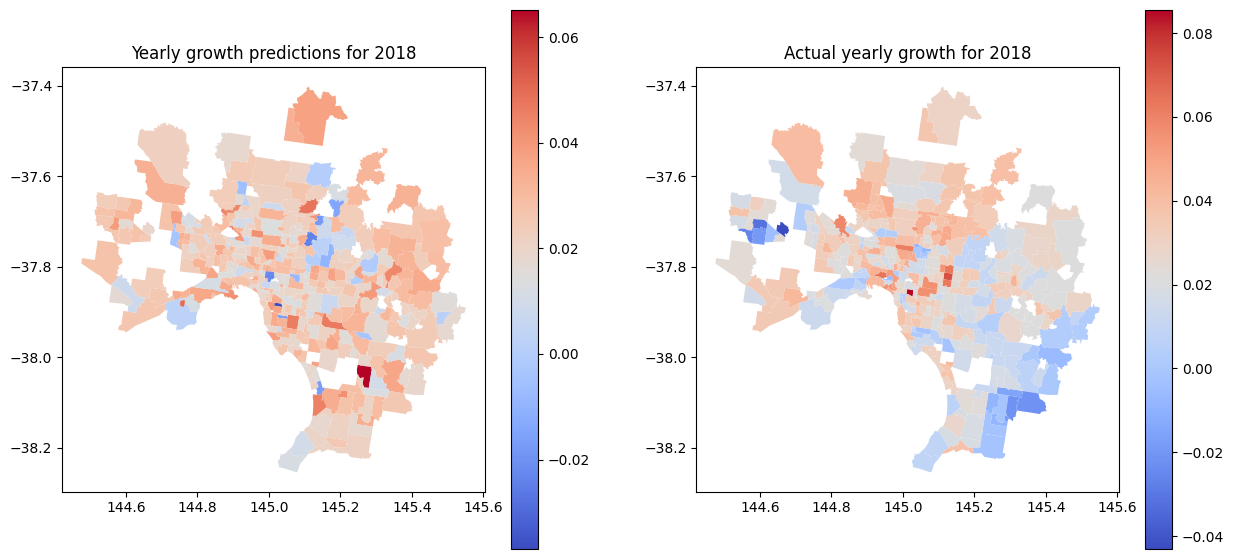

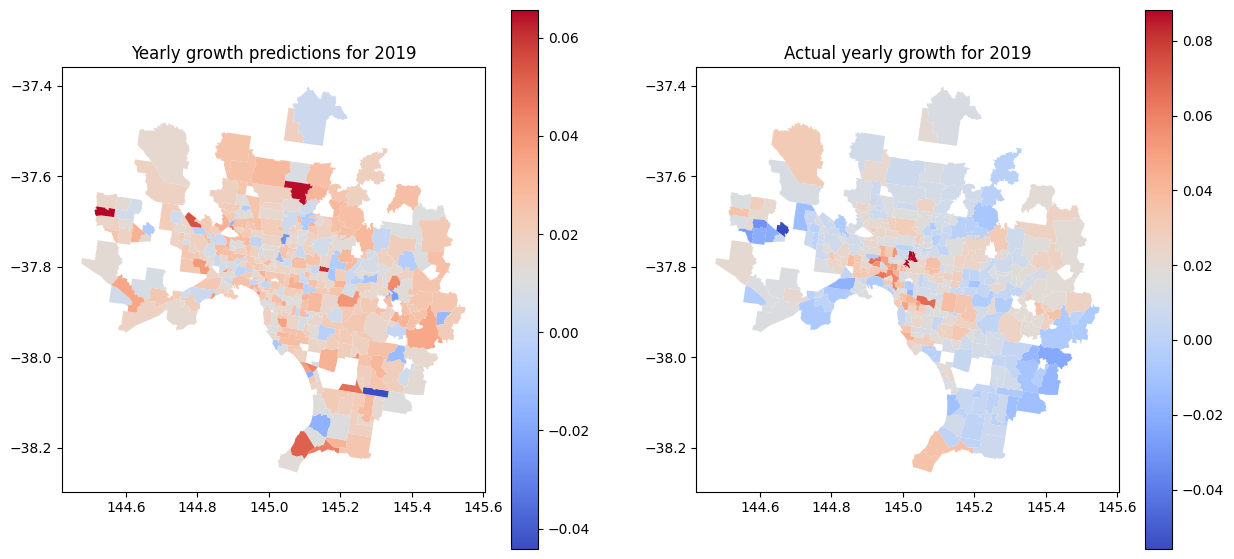

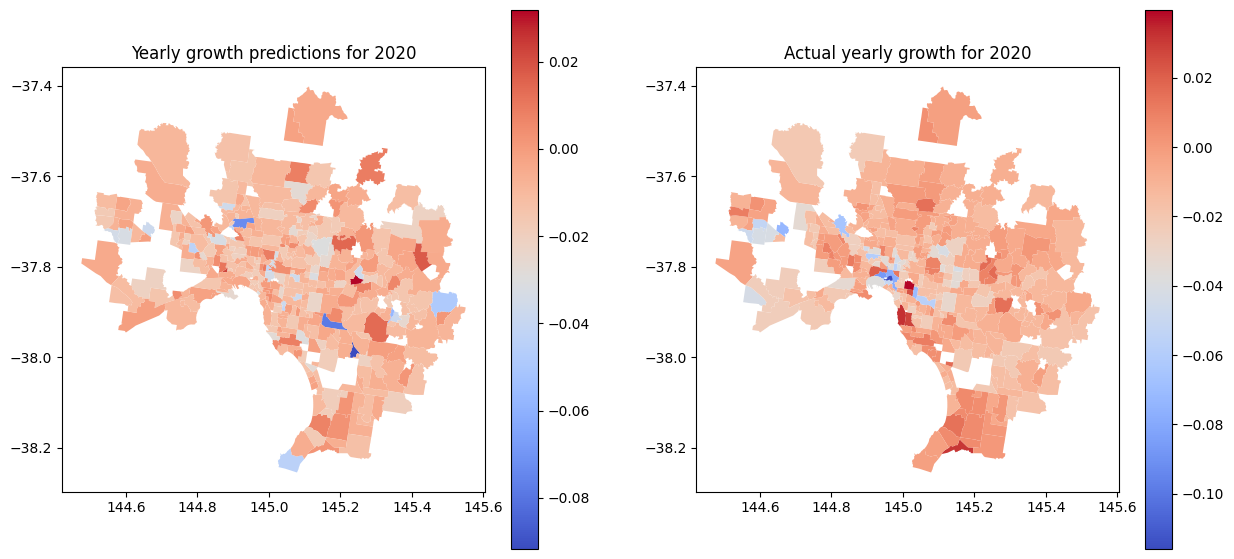

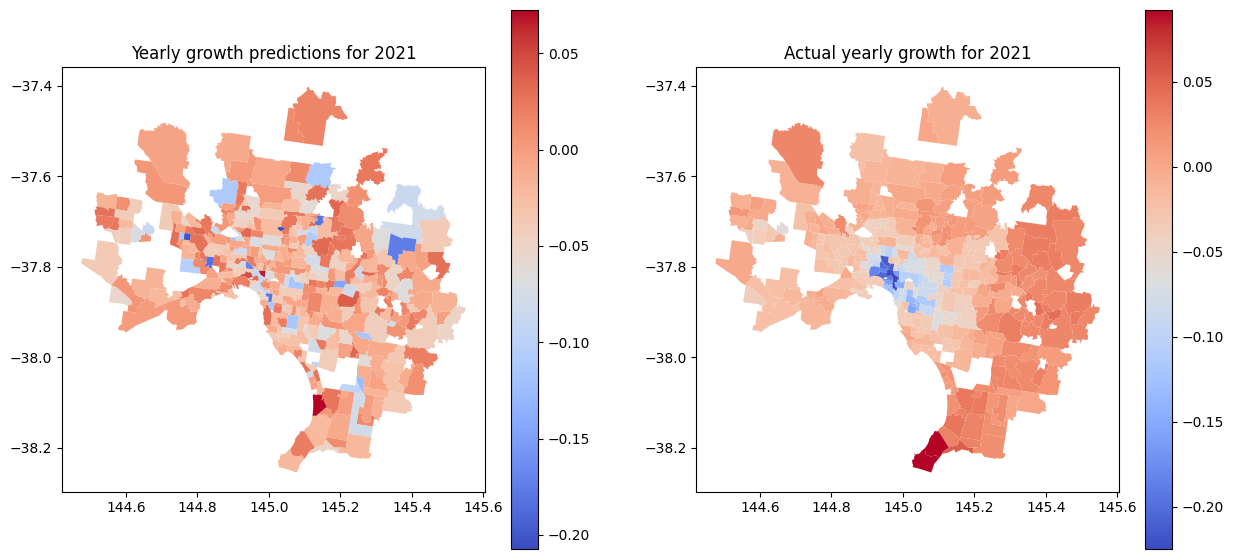

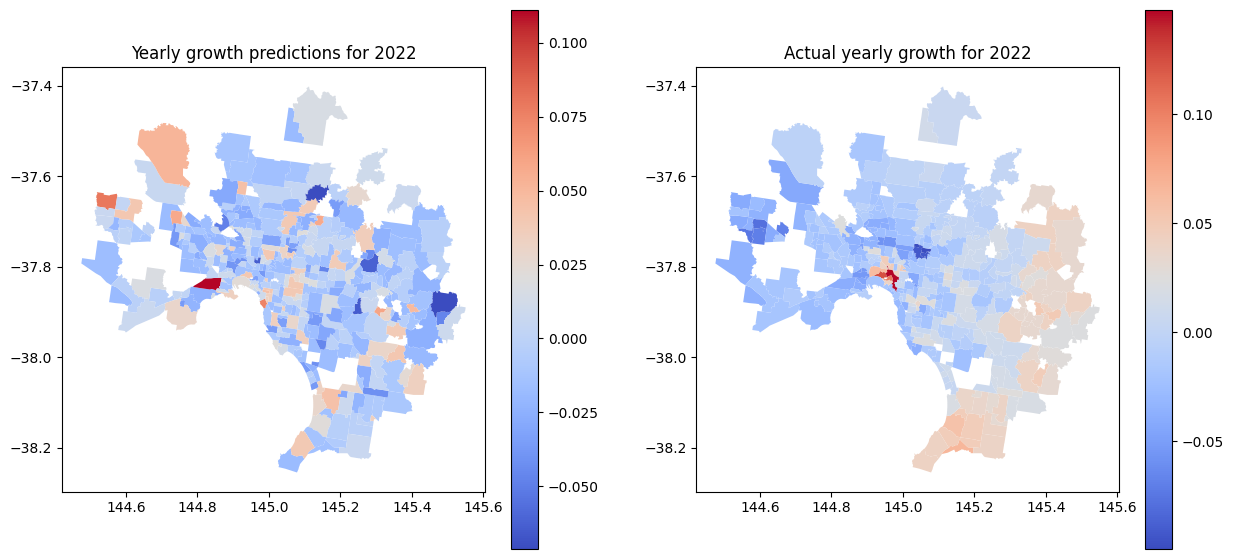

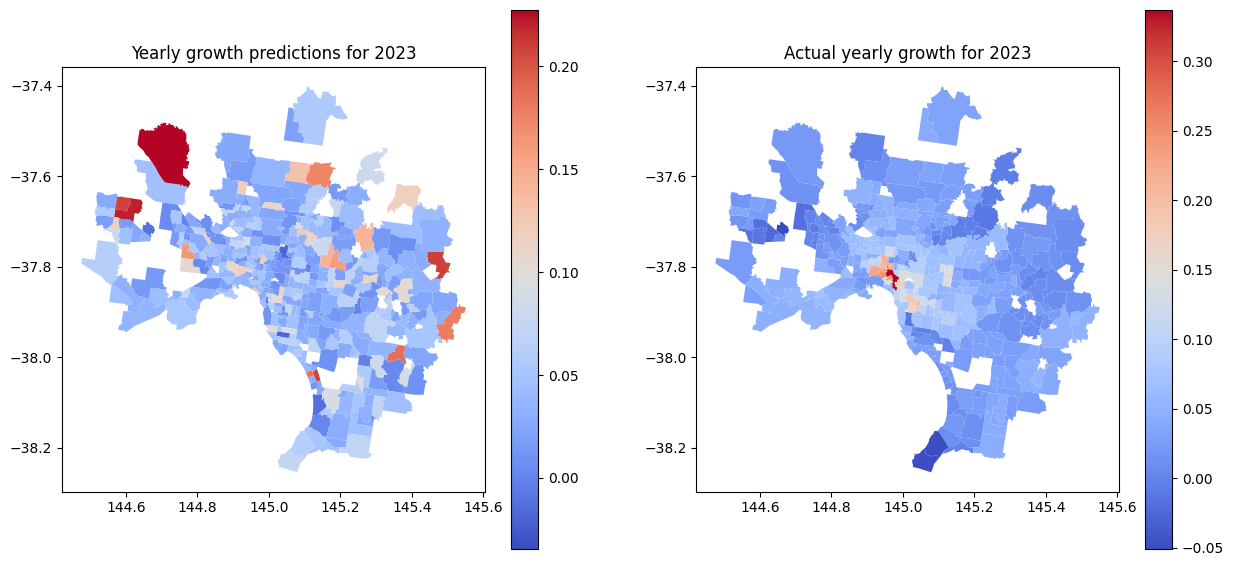

In [212]:
# get graph for every year
for year in range(2018, 2024):
    SAL_year = SAL[SAL['year'] == year]
    
    fig, axes = plt.subplots(1, 2, figsize=(15, 7))
    
    SAL_year.plot(column='predictions', cmap='coolwarm', legend=True, ax=axes[0])
    axes[0].set_title(f"Yearly growth predictions for {year}")
    
    SAL_year.plot(column='yearly_growth', cmap='coolwarm', legend=True, ax=axes[1])
    axes[1].set_title(f"Actual yearly growth for {year}")
    
    plt.savefig(f'../plots/yearly_growth_{year}.png')
    plt.show()


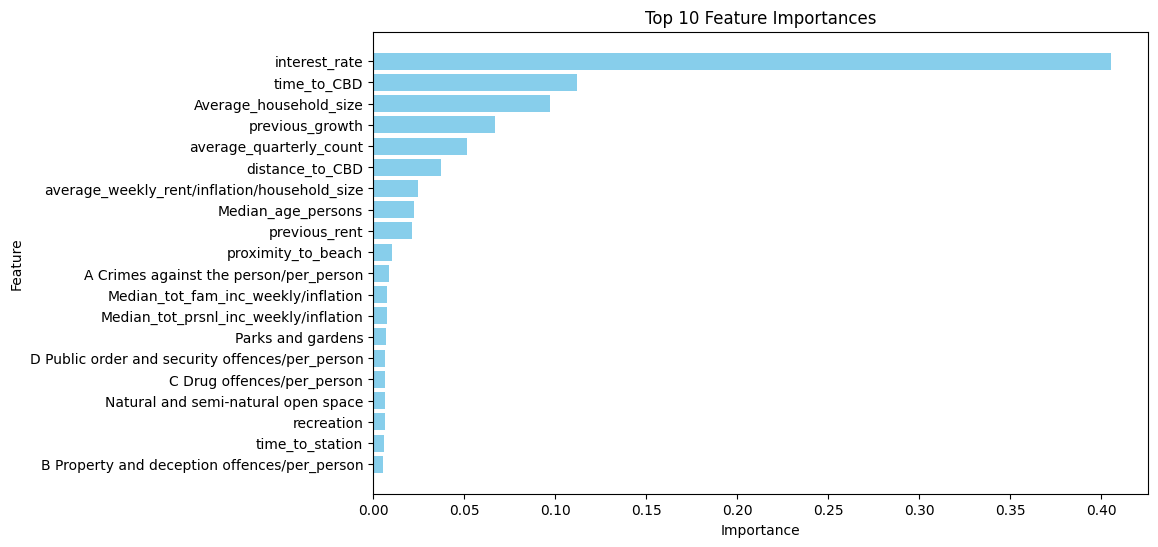

In [213]:
# get feeature importance
importances = rf_model.feature_importances_
# BEGIN: Get top 10 features and plot
import matplotlib.pyplot as plt

# Create a DataFrame for feature importances
feature_importances_df = pd.DataFrame({
    'feature': X.columns,
    'importance': importances
})

# Sort the DataFrame by importance
feature_importances_df = feature_importances_df.sort_values(by='importance', ascending=False)

# Get the top 10 features
top_10_features = feature_importances_df.head(20)

# Plot the top 10 features
plt.figure(figsize=(10, 6))
plt.barh(top_10_features['feature'], top_10_features['importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 10 Feature Importances')
plt.gca().invert_yaxis()
plt.show()
# END: Get top 10 features and plot